In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
'''
Part 1: UFO
'''
ufo = pd.read_csv('../data/ufo.csv')   # can also read csvs directly from the web!
ufo.head()


# 1. change the column names so that each name has no spaces
#           and all lower case (replace spaces with underscores)

# 2. Show a bar chart of all shapes reported

# 3. Show a dataframe that only displays the reportings from Utah

# 4. Show a dataframe that only displays the reportings from Texas

# 5. Show a dataframe that only displays the reportings from Utah OR Texas

# 6. Which shape is reported most often?

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [6]:
ufo.columns=[x.lower().replace(' ','_') for x in ufo.columns]
ufo.rename(columns={'City':'city', 'Colors Reported':'colors_reported','Shape Reported':'shape_reported','State':'state','Time':'time'}, inplace=True)
ufo.head()

,city,colors_reported,shape_reported,state,time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


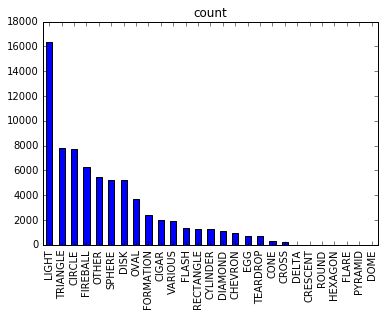

In [13]:
# 2. Show a bar chart of all shapes reported
#ufo.groupby('shape_reported').count().plot(kind='bar')
ufo.shape_reported.value_counts().plot(kind='bar',title='count')

In [18]:
# 3. Show a dataframe that only displays the reportings from Utah
ufo[ufo.state=='UT'].head()


,city,colors_reported,shape_reported,state,time
29,Ft. Duschene,NaN,DISK,UT,6/30/1944 10:00
164,Provo,BLUE,DISK,UT,7/10/1951 23:30
170,Salt Lake City,NaN,NaN,UT,1/1/1952 0:00
356,Salt Lake City,NaN,CIRCLE,UT,6/5/1956 0:00
433,Salt Lake City,NaN,DISK,UT,7/15/1957 22:00


In [17]:
# 4. Show a dataframe that only displays the reportings from Texas
ufo[ufo.state=='TX'].head()

,city,colors_reported,shape_reported,state,time
37,Dallas,NaN,SPHERE,TX,7/15/1945 14:00
43,Alice,NaN,DISK,TX,3/15/1946 15:30
49,Conroe,NaN,OTHER,TX,1/10/1947 20:00
92,Borger,NaN,DISK,TX,6/15/1948 16:00
114,Post,NaN,DISK,TX,9/15/1949 21:00


In [21]:
# 5. Show a dataframe that only displays the reportings from Utah OR Texas
ufo[(ufo.state=='TX') | (ufo.state=='UT')  ].head()

,city,colors_reported,shape_reported,state,time
29,Ft. Duschene,NaN,DISK,UT,6/30/1944 10:00
37,Dallas,NaN,SPHERE,TX,7/15/1945 14:00
43,Alice,NaN,DISK,TX,3/15/1946 15:30
49,Conroe,NaN,OTHER,TX,1/10/1947 20:00
92,Borger,NaN,DISK,TX,6/15/1948 16:00


In [23]:
# 6. Which shape is reported most often?
ufo.shape_reported.value_counts().head(1)

LIGHT    16332
Name: shape_reported, dtype: int64

In [41]:
'''
Part 2: FIFA GOALS
'''

goals = pd.read_csv('../data/fifa_goals.csv')
goals.sort_index(by='team1score', inplace = True)
goals.head()


# 1. Some elements in the minute column have a  '+', remove it and cast each element as an int!
#     Hint: To replace, use a .apply lambda function to remove any plus symbols
#     Hint: look up pandas dataframes astype method
#     To check use the dataframe.describe() method to see if it is an integer

# 2. Show goals scored in the first 5 minutes of a g
# 3. Show goals scored after the regulation 90 minutes is over

# 4. Show the top scoring players

# 5. Show a histogram (distribution) of minutes with 20 bins

# 6. Show a histogram of the number of goals scored by players

C:\Users\Cindy\Anaconda2\envs\ga\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,game_id,minute,player,team1score,team2score
1103,422,80,VlaoviÄ,0,2
1414,551,34,J. Cole,0,1
1423,554,60,FlÃ¡vio,0,1
1425,556,10,Å½igiÄ,0,1
1426,556,20,IliÄ,0,2


In [42]:
# 1. Some elements in the minute column have a  '+', remove it and cast each element as an int!
#     Hint: To replace, use a .apply lambda function to remove any plus symbols
#     Hint: look up pandas dataframes astype method
#     To check use the dataframe.describe() method to see if it is an integer


goals.minute=goals.minute.apply(lambda x:int(x.replace("+",'')) ) 
goals.minute.astype(int)
#x.astype(int)
goals.minute.describe()

count    2207.000000
mean       50.905754
std        27.514559
min         1.000000
25%        27.000000
50%        53.000000
75%        75.000000
max       120.000000
Name: minute, dtype: float64

In [34]:
# 2. Show goals scored in the first 5 minutes of a g
goals[goals.minute<=5].head()

,game_id,minute,player,team1score,team2score
1505,591,3,PetrÃ¡Å¡,0,1
404,130,1,Park Seung-jin,0,1
488,217,4,VujadinoviÄ,0,1
536,238,2,ButragueÃ±o,0,1
1350,524,4,Pauleta,0,1


In [35]:
# 3. Show goals scored after the regulation 90 minutes is over
goals[goals.minute>90].head()

,game_id,minute,player,team1score,team2score
1471,577,119,Grosso,0,1
1472,577,120,Del Piero,0,2
2057,806,94,Ä°lhan [Golden Goal],0,1
1198,463,106,Milla,1,0
1215,470,119,Platt,1,0


In [44]:
# 4. Show the top scoring players
goals[['player']][goals.team1score.max()] 

KeyError: 9

In [ ]:
# 5. Show a histogram (distribution) of minutes with 20 bins

In [ ]:
# 6. Show a histogram of the number of goals scored by players